# Imports

In [1]:
!pip install resampy

In [52]:
import os
import librosa
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.regularizers import l2
from keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from itertools import cycle
from tensorflow.keras.callbacks import EarlyStopping
import seaborn as sns
import resampy

# Feature Extraction Functions



In [3]:
train_path = '/content/drive/MyDrive/Voice-Dataset/Voice Emotion Detection/Train/train'
test_path = '/content/drive/MyDrive/Voice-Dataset/Voice Emotion Detection/Test/test'
test_csv_path = '/content/drive/MyDrive/Voice-Dataset/Voice Emotion Detection/Test/result.csv'

In [4]:
# Function to extract MFCC features from audio files
def extract_features(file_path):
    audio, sample_rate = librosa.load(file_path, res_type='kaiser_fast')
    mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled = np.mean(mfccs.T, axis=0)
    return mfccs_scaled

In [5]:
# Function to extract features including gender
def extract_features_with_gender(file_path):
    audio, sample_rate = librosa.load(file_path, res_type='kaiser_fast')
    mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled = np.mean(mfccs.T, axis=0)
    gender = file_path.split('/')[-1].split('.')[0][-2]  # Extract gender from filename
    gender_encoded = 0 if gender == 'M' else 1  # Encode gender: M=0, F=1
    features = np.append(mfccs_scaled, gender_encoded)
    return features

In [6]:
# Prepare the training data
train_files = os.listdir(train_path)
X_train = []
y_train = []

In [7]:
train_files

['1362FA.wav',
 '1363FN.wav',
 '1364MN.wav',
 '1365MW.wav',
 '1367MW.wav',
 '1366FW.wav',
 '1368FA.wav',
 '1371MN.wav',
 '1372MA.wav',
 '1369MN.wav',
 '1376FA.wav',
 '1377MN.wav',
 '1378MA.wav',
 '1386MN.wav',
 '1384FS.wav',
 '1387MN.wav',
 '1385MA.wav',
 '1388MS.wav',
 '1392FH.wav',
 '1389FH.wav',
 '1390FN.wav',
 '1393MA.wav',
 '1394MN.wav',
 '1395FS.wav',
 '1396MN.wav',
 '1397MA.wav',
 '1402MA.wav',
 '1398FA.wav',
 '1406MN.wav',
 '1403MA.wav',
 '1407MN.wav',
 '1405MA.wav',
 '1408MS.wav',
 '1410MH.wav',
 '1411FA.wav',
 '1409MS.wav',
 '1413MA.wav',
 '1412MN.wav',
 '1414FA.wav',
 '1415MA.wav',
 '1416MH.wav',
 '1417MA.wav',
 '1418MA.wav',
 '1420MN.wav',
 '1421MN.wav',
 '1422MN.wav',
 '1424MS.wav',
 '1426MN.wav',
 '1425MN.wav',
 '1428MN.wav',
 '1431MA.wav',
 '1432MA.wav',
 '1433FN.wav',
 '1436FW.wav',
 '1434MN.wav',
 '1438FA.wav',
 '1439FN.wav',
 '1440FN.wav',
 '1443FN.wav',
 '1444MN.wav',
 '1445FS.wav',
 '1447MS.wav',
 '1448FH.wav',
 '1449FA.wav',
 '1451MA.wav',
 '1452FA.wav',
 '1453MN.w

# Pre Processing Phase

In [8]:
for file in train_files:
    if file.endswith('.wav'):
        file_path = os.path.join(train_path, file)
        features = extract_features(file_path)
        X_train.append(features)
        emotion = file.split('.')[0][-1]
        y_train.append(emotion)

In [9]:
X_train = np.array(X_train)
y_train = np.array(y_train)

## Encode the labels

In [10]:
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_train = to_categorical(y_train)

## Print the shape of the training data


In [11]:
print("Shape of X_train: ", X_train.shape)
print("Shape of y_train: ", y_train.shape)

Shape of X_train:  (1998, 40)
Shape of y_train:  (1998, 6)


# LSTM Model

In [14]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(X_train.shape[1], 1), kernel_regularizer=l2(0.001)))
model.add(Dropout(0.6))
model.add(LSTM(128, kernel_regularizer=l2(0.001)))
model.add(Dropout(0.6))
model.add(Dense(y_train.shape[1], activation='softmax', kernel_regularizer=l2(0.001)))

## Compile the model

In [15]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

## Set up early stopping


In [21]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

## Train the model


In [22]:
history = model.fit(X_train, y_train, epochs=200, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/200
50/50 [==============================] - 8s 32ms/step - loss: 1.5955 - accuracy: 0.5075 - val_loss: 1.4325 - val_accuracy: 0.5475
Epoch 2/200
50/50 [==============================] - 0s 9ms/step - loss: 1.4823 - accuracy: 0.5232 - val_loss: 1.3954 - val_accuracy: 0.5475
Epoch 3/200
50/50 [==============================] - 0s 9ms/step - loss: 1.4067 - accuracy: 0.5432 - val_loss: 1.2236 - val_accuracy: 0.6025
Epoch 4/200
50/50 [==============================] - 0s 10ms/step - loss: 1.3019 - accuracy: 0.5851 - val_loss: 1.1833 - val_accuracy: 0.6250
Epoch 5/200
50/50 [==============================] - 0s 9ms/step - loss: 1.2321 - accuracy: 0.5989 - val_loss: 1.1763 - val_accuracy: 0.6300
Epoch 6/200
50/50 [==============================] - 0s 9ms/step - loss: 1.2128 - accuracy: 0.6058 - val_loss: 1.1437 - val_accuracy: 0.6300
Epoch 7/200
50/50 [==============================] - 0s 10ms/step - loss: 1.1879 - accuracy: 0.6126 - val_loss: 1.1188 - val_accuracy: 0.6350
Epoch 8/20

# Plotting training history

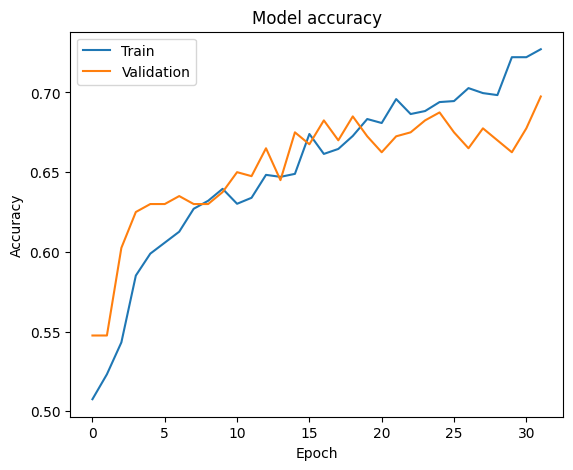

In [23]:
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

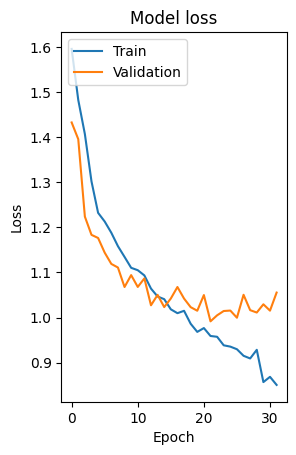

In [24]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Load the test CSV file

In [25]:
test_results = pd.read_csv(test_csv_path)

## Prepare the test data using the result.csv file


In [26]:
X_test = []
y_test = []

In [27]:
for index, row in test_results.iterrows():
    file_id = row['Id']
    emotion = row['label']
    file_path = os.path.join(test_path, f"{file_id}.wav")
    if os.path.exists(file_path):
        features = extract_features(file_path)
        X_test.append(features)
        y_test.append(emotion)

In [28]:
X_test = np.array(X_test)
y_test = np.array(y_test)

## Encode the test labels

In [29]:
y_test = encoder.transform(y_test)
y_test = to_categorical(y_test)

# Evaluate the model


In [30]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy: ", test_accuracy)

8/8 [==============================] - 0s 6ms/step - loss: 1.0381 - accuracy: 0.6726
Test Accuracy:  0.6725663542747498


# Prepare the training data with gender

In [31]:
X_train_with_gender = []

In [32]:
for file in train_files:
    if file.endswith('.wav'):
        file_path = os.path.join(train_path, file)
        features = extract_features_with_gender(file_path)
        X_train_with_gender.append(features)

In [33]:
X_train_with_gender = np.array(X_train_with_gender)

## Define the model with gender feature and regularization

In [34]:
model_with_gender = Sequential()
model_with_gender.add(LSTM(128, return_sequences=True, input_shape=(X_train_with_gender.shape[1], 1), kernel_regularizer=l2(0.001)))
model_with_gender.add(Dropout(0.6))
model_with_gender.add(LSTM(128, kernel_regularizer=l2(0.001)))
model_with_gender.add(Dropout(0.6))
model_with_gender.add(Dense(y_train.shape[1], activation='softmax', kernel_regularizer=l2(0.001)))

## Compile and train the model with gender

In [35]:
model_with_gender.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
history_with_gender = model_with_gender.fit(X_train_with_gender, y_train, epochs=200, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/200
50/50 [==============================] - 5s 26ms/step - loss: 1.6189 - accuracy: 0.4937 - val_loss: 1.4360 - val_accuracy: 0.5400
Epoch 2/200
50/50 [==============================] - 0s 10ms/step - loss: 1.4897 - accuracy: 0.5156 - val_loss: 1.3836 - val_accuracy: 0.5475
Epoch 3/200
50/50 [==============================] - 1s 10ms/step - loss: 1.4319 - accuracy: 0.5250 - val_loss: 1.3463 - val_accuracy: 0.5700
Epoch 4/200
50/50 [==============================] - 0s 9ms/step - loss: 1.3702 - accuracy: 0.5451 - val_loss: 1.2253 - val_accuracy: 0.6175
Epoch 5/200
50/50 [==============================] - 0s 10ms/step - loss: 1.2493 - accuracy: 0.6039 - val_loss: 1.1509 - val_accuracy: 0.6300
Epoch 6/200
50/50 [==============================] - 0s 9ms/step - loss: 1.1987 - accuracy: 0.6133 - val_loss: 1.1561 - val_accuracy: 0.6300
Epoch 7/200
50/50 [==============================] - 0s 9ms/step - loss: 1.1725 - accuracy: 0.6295 - val_loss: 1.1054 - val_accuracy: 0.6450
Epoch 8/2

# Prepare the test data with gender

In [36]:
X_test_with_gender = []

In [37]:
for index, row in test_results.iterrows():
    file_id = row['Id']
    emotion = row['label']
    file_path = os.path.join(test_path, f"{file_id}.wav")
    if os.path.exists(file_path):
        features = extract_features_with_gender(file_path)
        X_test_with_gender.append(features)

# Test Accuracy

In [38]:
X_test_with_gender = np.array(X_test_with_gender)
test_loss_with_gender, test_accuracy_with_gender = model_with_gender.evaluate(X_test_with_gender, y_test)
print("Test Accuracy with Gender: ", test_accuracy_with_gender)

8/8 [==============================] - 0s 7ms/step - loss: 1.0710 - accuracy: 0.6681
Test Accuracy with Gender:  0.6681416034698486


# Confusion matrix

In [39]:
y_pred = model_with_gender.predict(X_test_with_gender)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

8/8 [==============================] - 1s 5ms/step


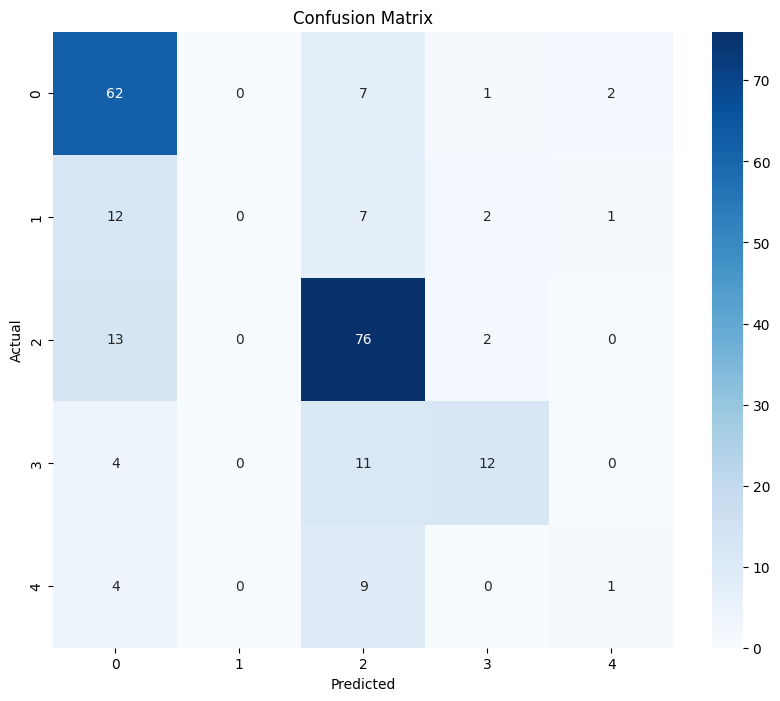

In [40]:
conf_matrix = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve and AUC

In [47]:
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_train.shape[1]

In [54]:
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


## Compute micro-average ROC curve and ROC area

In [55]:
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

## Plot ROC curves

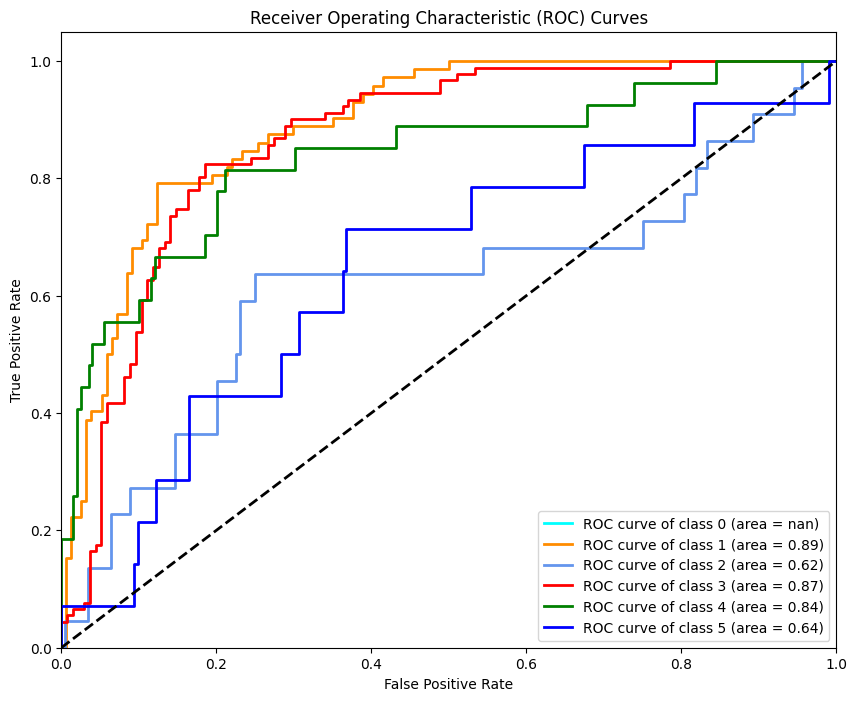

In [56]:
plt.figure(figsize=(10, 8))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'red', 'green', 'blue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.show()